## 测量模型 + 结构模型（路径模型）= 潜变量结构方程模型


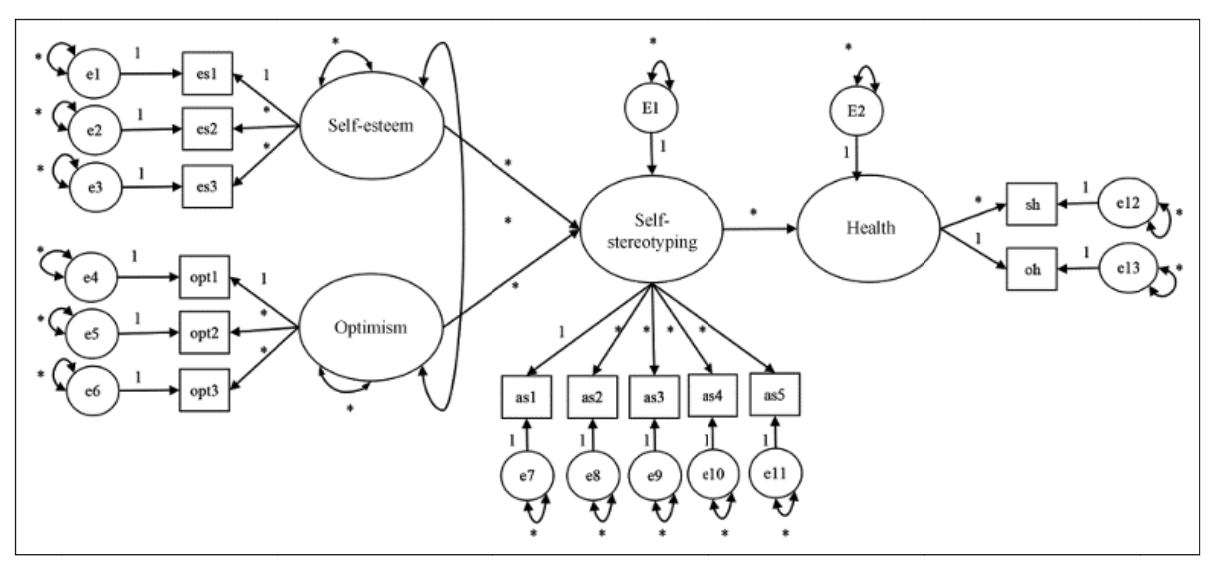

### 上面潜变量结构方程模型包含以下两部分：

1. a, b, c三个测量模型
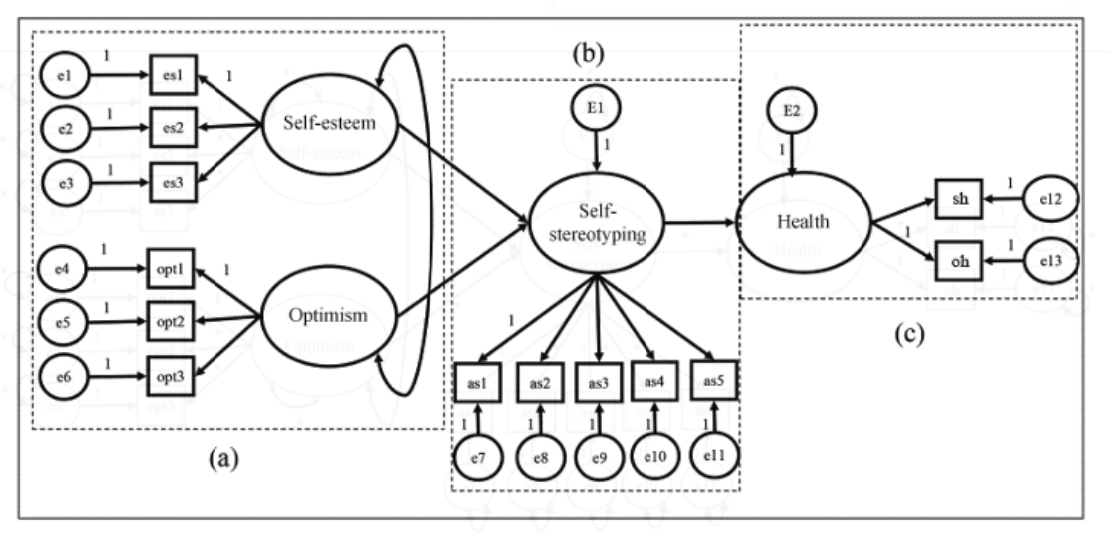

a是一个双维度测量模型

b和c是单变量测量模型

2. 结构模型
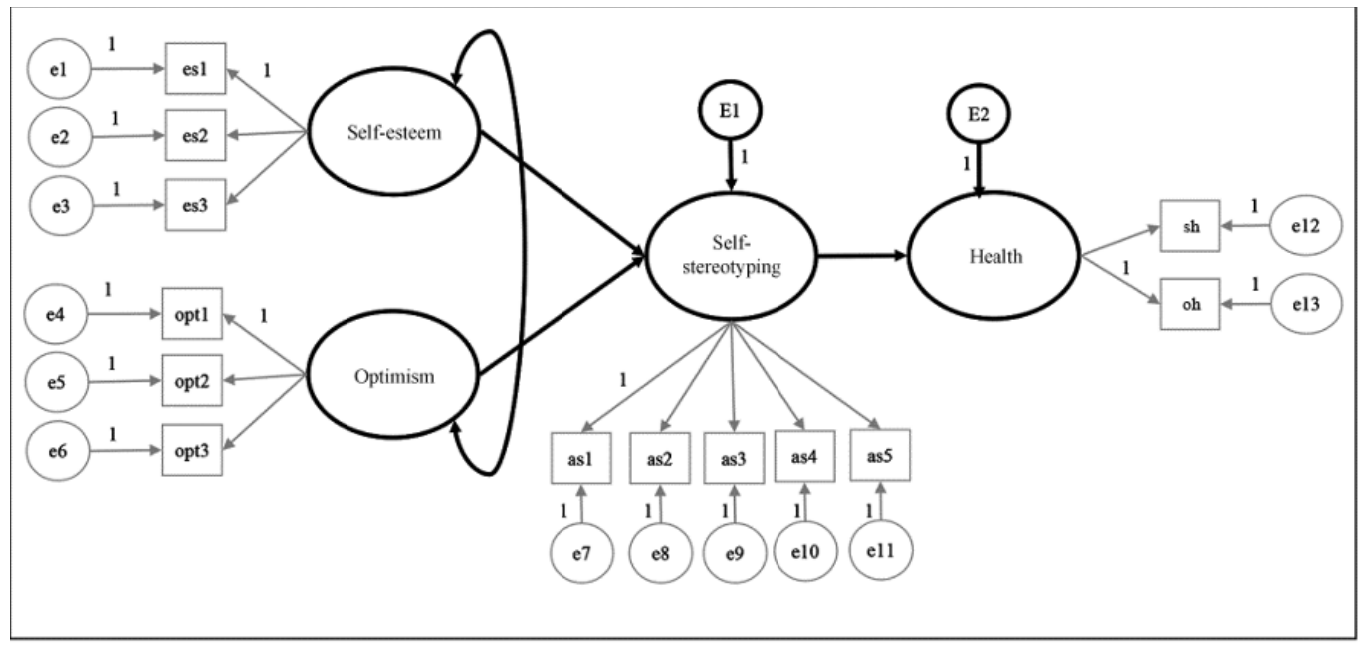

## 潜变量结构方程模型两步建模

#### step 1：建立测量模型

帮助确定测量模型的聚合效度和区分效度

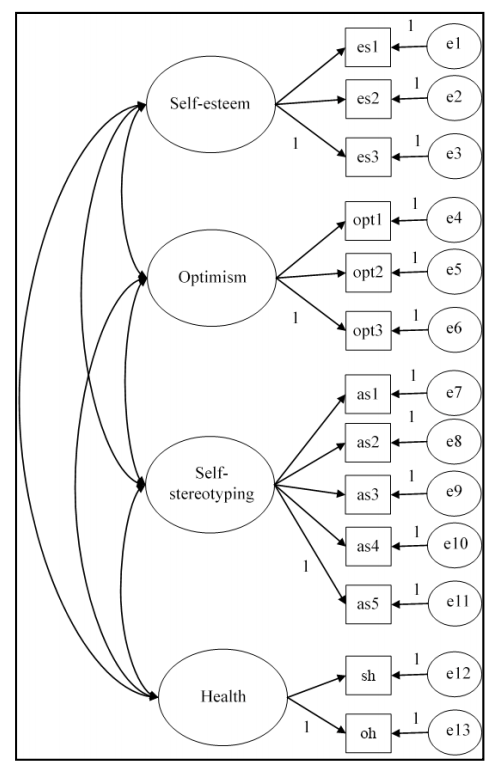


In [ ]:
# 导入数据
BASE <- readxl::read_excel("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data3_18.xlsx")

In [ ]:
# 在lavaan中定义模型
model.SPE <- 'esteem =~ es1 + es2 + es3 
                optimism =~ lot1 + lot2 + lot3 
                stereotype =~ as1 + as2 + as3 + as4 + as5 
                health =~ sh + oh'

In [ ]:
# 模型估计
model.EST <- cfa (model.SPE, data = BASE)

In [ ]:
# 取统计结果
summary (model.EST, 
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE)

#### step 2：测量模型基础上加上结构模型


In [ ]:
# 在lavaan中定义模型
model.SPE <- ' 
        # Measurement models 
        esteem =~ es1 + es2 + es3 
        optimism =~ lot1 + lot2 + lot3 
        stereotype =~ as1 + as2 + as3 + as4 + as5 
        health =~ sh + oh 

        # Structural model 
        stereotype ~ a*esteem + b*optimism 
        health ~ c*stereotype 
        # Indirect effect 
        indirect:= a*b*c'